<a href="https://academics.sheridancollege.ca/programs/computer-engineering-technology"><img src="https://www.sheridancollege.ca/-/media/project/sheridan/shared/images/logos/sheridan-logo-header.svg" width="300" align="center"></a>


<h1><center>AI Application (ENGI51071) - Lab 3 </center></h1>
<h2><center>Student Name(s): Confidence Ahuekwe | Student Number: 991714953 | Date: 8th February, 2024.</center></h2> 

<h3>Lab Overview</h3>
This is part of the lab series for AI Application (ENGI51071). In this lab, we learn how to use Python libary to implement calssification algorithms: support vector machine and logistic regression.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href='#Import_Needed_Packages'>Import Needed Packages</a></li>
        <li><a href='#About_Data'>About Data</a></li>
        <li><a href='#Support_Vector_Machine'>Support Vector Machine</a></li>   
        <li><a href='#Logistic_Regression'>Logistic Regression</a></li>
        <li><a href='#Practice'>Practice</a></li>
    </ol>
</div>
<br>
<hr>

<a id='Import_Needed_Packages'></a>
<h2> 1. Import Needed packages </h2>
<h3> For this lab, the following packages are needed </h3><br>
random: Python library for random number generation <br>
numpy: Python library for working with arrays<br>
matplotlib: Python inline ploting library<br>
pandas: Python Data Analysis Library to work with dataframes<br>
sklearn: scikit-learn, a commonly used machine learning library. 

In [2]:
!pip install pandas 

In [1]:
import numpy as np
import pylab as pl
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import itertools

C:\Users\user\AppData\Local\Temp\ipykernel_37316\206135323.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<a id='About_Data'></a>
<h2> 2. About Data </h2>
<h3> For this lab, the following packages are needed </h3><br>
numpy: Python library for working with arrays<br>
matplotlib: Python inline ploting library<br>
pandas: Python Data Analysis Library to work with dataframes<br>
sklearn: scikit-learn, a commonly used machine learning library. 

In this lab, we are going to use the UCI bank marketing dataset provided by The University of California, Irvine  repository. You may find more information about this dataset from the link below: <br>

<h4>UCI Bank Marketing Dataset Repository link: <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing">click here</a></h4>
In the cell below, read in the csv file "bank.csv".  <br>

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information (not all are included in the condense dataset:<br>
Input variables:<br>
bank client data:<br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - balance: account balance (numeric)<br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
related with the last contact of the current campaign:<br>
9 - contact: contact communication type (categorical: 'cellular','telephone') <br>
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
other attributes:<br>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
social and economic context attributes<br>
17 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
18 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
19 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
20 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
21 - nr.employed: number of employees - quarterly indicator (numeric)<br>

Output variable (desired target):<br>
22 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

Relevant Papers:<br>
S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014<br>

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]<br>

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt



In [2]:
bank_df = pd.read_csv('bank.csv',sep=';')
bank_df.shape

(4521, 17)

__Note__: This date set comes with two files, the bigger one bank-full.csv has all examples, ordered by date (from May 2008 to November 2010). The smaller dataset bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv. We are going to use the smaller one in today's lab for faster computation. <br>
__Note__: The format of this csv file is slightly different, it uses ';' as the separator, therefore, your read-in process has to indicate the separator in order to accommodate that. 

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


The following step visualizes the conversion success using selected features. 

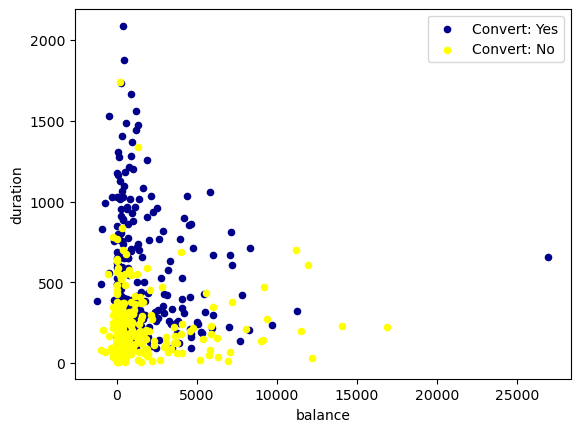

In [5]:
# Data visualization
ax = bank_df[bank_df['y'] == 'yes'][0:250].plot(kind='scatter', x='balance', y='duration', color='DarkBlue', label='Convert: Yes');
bank_df[bank_df['y'] == 'no'][0:250].plot(kind='scatter', x='balance', y='duration', color='Yellow', label='Convert: No', ax=ax);

plt.show()

__Question 1__:  Based on the scatter plot above, do you think this data set is linear separable? Why? <br>
Please record your answers on lab3 on SLATE quiz tool. <br>
__Ans 1:__ Based on the scatter plot, I think this data set is linearly separable. This means that there exists a straight line that can separate the two classes of data points, “Convert: Yes” and “Convert: No”, with minimal error. A linear classifier, such as a logistic regression or a support vector machine, could likely perform well on this data set.

__Question 2__:  Can you still apply Support Vector Machine (SVM) when the data set is not linear separable?  How?  <br>
Please record your answers on lab3 on SLATE quiz tool. <br>
__Ans 2:__ Yes, Support Vector Machine (SVM) can handle non-linearly separable data by using either kernel functions or soft margins, or both.

One way is to use a kernel function to transform the data into a higher-dimensional space where it becomes linearly separable. A kernel function is a function that computes the similarity between two data points without explicitly mapping them to a new space. Some common kernel functions are the polynomial kernel, the radial basis function (RBF) kernel, and the sigmoid kernel. 

Another way is to use a soft margin to allow some misclassification errors in the training data. A soft margin introduces a penalty term for the errors, which is controlled by a hyperparameter C. A larger C means a smaller margin and less errors, while a smaller C means a larger margin and more errors. By using a soft margin, overfitting to the noisy or outlier data points can avoided.

In [6]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

__Question 3__:  What is the purpose for the operations below? Why are they needed?  <br>
Please record your answers on lab3 on SLATE quiz tool. <br>
__Ans 3:__ The purpose of the operations below is to prepare the data for a machine learning model that predicts whether a client will subscribe to a term deposit or not, based on a bank marketing dataset.
These operations are needed because machine learning models usually require numerical inputs and outputs, and because some features may be more informative or relevant than others for the prediction task. By selecting and transforming the data, the model can learn more efficiently and accurately.
The first operation, feature_df = bank_df[['duration','age','campaign','pdays']], selects four features from the original dataset that are relevant for the prediction task.
The second operation, bank_df.y.replace(('yes', 'no'), (1, 0), inplace=True), converts the target column, y, from a categorical variable to a numerical one. The target column indicates whether the client subscribed to a term deposit or not (binary: ‘yes’,‘no’). By replacing ‘yes’ with 1 and ‘no’ with 0, the target column becomes suitable for a binary classification model.

In [7]:
feature_df = bank_df[['duration','age','campaign','pdays']]

target_df = bank_df['y']

# Convert the target from categorical to numerical
target_df.replace(('yes', 'no'), (1, 0), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_37316\1875057314.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_df.replace(('yes', 'no'), (1, 0), inplace=True)


__Task 1__:  In this cell below to split the test and training set to be 20% vs 80%, and use "duration","age", "campaign", and "pdays" as features in your SVM model, store these information in test_x, test_y, train_x, train_y respectively  <br>
Please record your answers on lab3 on SLATE quiz tool. <br>

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data into test and training sets with 20% vs 80% ratio

train_x, test_x, train_y, test_y = train_test_split(feature_df, target_df, test_size=0.2, random_state=42)

Your test_y and train_y arrays need to be raveled to meet the requirement of the SVM classier. 

In [9]:
train_y = train_y.ravel()
test_y = test_y.ravel()

C:\Users\user\AppData\Local\Temp\ipykernel_37316\2519894489.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  train_y = train_y.ravel()
C:\Users\user\AppData\Local\Temp\ipykernel_37316\2519894489.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  test_y = test_y.ravel()


<a id='Support_Vector_Machine'></a>
<h2> 3. Support Vector Machine </h2>
<h3> Now let's implement the vector machine classifier </h3><br>


In Schikit-learn. a SVM library is available for simple SVM classifier applications.  In addition, it also offers a few choices of kernel functions if needed. : 
<ol>
    <li>Linear </li>
    <li>Polynomial</li>
    <li>Radial basis function (RBF) </li>
    <li>Sigmoid </li>
</ol>

The theory behind the choice of kernel functions is beyond the scope of this course.  For beginners, you may just use trial and error to compare the prediction results. 

In [10]:
from sklearn import svm
# Create a SVM model
# The default kernal function is 'rbf', can be changed between ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svm_model = svm.SVC(kernel='rbf') 

In [11]:
# Model training
train_y = train_y.ravel()
test_y = test_y.ravel()
svm_model.fit(train_x, train_y)

SVC()

In [12]:
# Prediction
y_hat = svm_model.predict(test_x)
print(y_hat[0:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


__Question 4__:  What is the meaning of 0's and 1's in y_hat?   <br>
Please record your answers on lab3 on SLATE quiz tool. <br>
__Ans:__ The 0’s and 1’s in y_hat represent the binary classification predictions made by the model. In this context, 0 indicates a negative class and 1 a positive class. In the case of predicting whether a client will subscribe to a term deposit or not, 0 means “no” and 1 means “yes”. The model assigns a 0 or 1 to each test instance based on the features and the kernel function used.

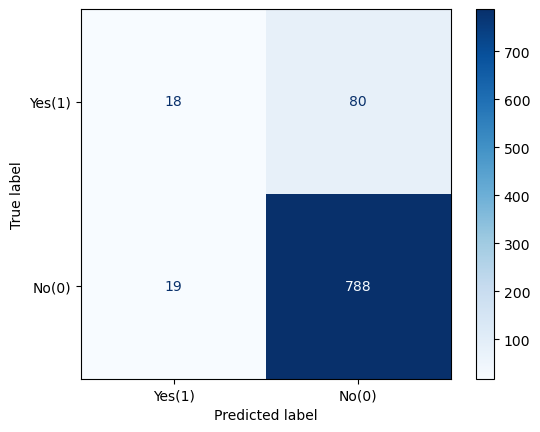

In [13]:
# Evaluation 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
confusion_mat = confusion_matrix(test_y, y_hat, labels=[1,0])
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels = ['Yes(1)','No(0)'])
disp.plot(cmap='Blues')
plt.show()

__Question 5__:  What are the accuracy, error rate, precision and recall of your model?   <br>
Please record your answers on lab3 on SLATE quiz tool. <br>
__Ans:__
Based on the Computed confusion matrix:
TP = 18, TN = 788, FP = 19, FN = 80.

ACCURACY = (TP + TN)/(TP + TN + FP + FN) = 0.89 = 89%

ERROR RATE = 1 - Accuracy = 1 - 0.89 = 0.11 = 11%

PRECISION = TP/(TP + FP) = 0.486 = 48.6%

RECALL (Sensitivity) = TP/(TP + FN) = 0.18 = 18%

__Task 2__. In order to further evaluation the skills of the classifier, please implement 10 fold cross validation and record your code and result on Lab3 on SLATE quiz tool. <br>
Note: please use scoring = 'accuracy' for this exercise. 

In [14]:
# Test your code below
from sklearn.model_selection import cross_val_score

# Create a new SVM model
svm_model_cv = svm.SVC(kernel='rbf')

# Perform 10-fold cross-validation with accuracy scoring
cv_scores = cross_val_score(svm_model_cv, feature_df, target_df, cv=10, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the scores
mean_accuracy = np.mean(cv_scores)
std_score = np.std(cv_scores)

# Print the mean and standard deviation
print(f"Mean Accuracy: {mean_accuracy:.3f}")
print(f'Standard deviation: {std_score:.3f}')

Cross-validation scores: [0.89183223 0.90044248 0.87610619 0.8960177  0.88495575 0.88938053
 0.88274336 0.89159292 0.88495575 0.88053097]
Mean Accuracy: 0.888
Standard deviation: 0.007


<a id='Logistic_Regression'></a>
<h2> 4. Logistic Regression </h2>
<h3> Now let us use logistic regression to create a prediction model </h3><br>
Scikit-learn has a very logistric regression model that uses several parameters for model tuning. You may find more information about this classifier from Scikit-learn website. link: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">click here.</a></h4> 

In [15]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(train_x,train_y)  

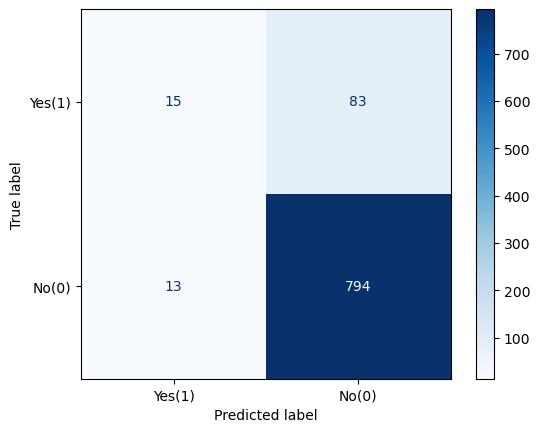

In [16]:
# Prediction
y_hat = LR_model.predict(test_x)
y_hat_probability = LR_model.predict_proba(test_x)

# Compute confusion matrix
confusion_mat = confusion_matrix(test_y, y_hat, labels=[1,0])
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels = ['Yes(1)','No(0)'])
disp.plot(cmap='Blues')
plt.show()

__Question 6__:  What are the accuracy, error rate, precision and recall of your model?   <br>
Please record your answers on lab3 on SLATE quiz tool. <br>

__Ans:__
Based on the Logistic Regression confusion matrix:
TP = 15, TN = 794, FP = 13, FN = 83.

ACCURACY = (TP + TN)/(TP + TN + FP + FN) = 0.894 = 89.4%

ERROR RATE = 1 - Accuracy = 1 - 0.89 = 0.106 = 10.6%

PRECISION = TP/(TP + FP) = 0.536 = 53.6%

RECALL (Sensitivity) = TP/(TP + FN) = 0.18 = 15%

<a id='Practice'></a>
<h2>5. Practice </h2>

__Task 3__.In the cell below, please make changes to the models we have created before to improve the performance of the classifier. You can choose either one of the classifier model or create a different one. <br>
Please record your code on lab3 on SLATE quiz tool. <br>

In [17]:
# Create a SVM model
svm_model2 = svm.SVC(kernel='sigmoid') 

In [18]:
# Model training
train_y = train_y.ravel()
test_y = test_y.ravel()
svm_model2.fit(train_x, train_y)

SVC(kernel='sigmoid')

In [19]:
# Prediction
y_hat2 = svm_model2.predict(test_x)
print(y_hat2[0:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


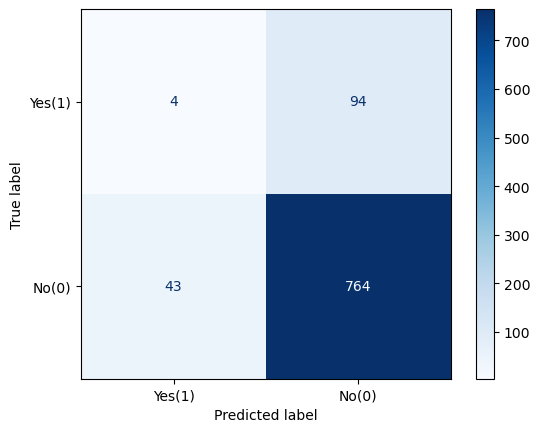

In [20]:
# Compute confusion matrix
confusion_mat = confusion_matrix(test_y, y_hat2, labels=[1,0])
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels = ['Yes(1)','No(0)'])
disp.plot(cmap='Blues')
plt.show()

In [22]:
# Create a new SVM model
svm_model_cv2 = svm.SVC(kernel='sigmoid')

# Perform 10-fold cross-validation with accuracy scoring
cv_scores2 = cross_val_score(svm_model_cv2, feature_df, target_df, cv=10, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores2)

# Calculate the mean and standard deviation of the scores
mean_accuracy2 = np.mean(cv_scores2)
std_score2 = np.std(cv_scores2)

# Print the mean and standard deviation
print(f"Mean Accuracy: {mean_accuracy2:.3f}")
print(f'Standard deviation: {std_score2:.3f}')

Cross-validation scores: [0.83002208 0.83849558 0.83849558 0.84734513 0.84070796 0.83628319
 0.83628319 0.83628319 0.84513274 0.8340708 ]
Mean Accuracy: 0.838
Standard deviation: 0.005
